In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn import metrics
from itertools import cycle

import seaborn as sns
import matplotlib.pyplot as plt
from src.processing.bootstrapping import bootstrap_perSample
from src.processing.bootstrapping import bootstrap_equal
# from src.modeling.MLR import run_MLR
from src.modeling.MLR import data_split_new
import os
import pickle
from copy import copy, deepcopy




%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10.0,8.27)})


In [2]:
# Control
c0 = ['ATP2B4']
# MMR
c1 = ['MLH1', 'MSH2', 'MSH6', 'PMS2', 'PMS1']
# HR
c2 = ['EXO1', 'RNF168']
# BER
c3 = ['OGG1', 'UNG']

def SBS_feat():
    zou = pd.read_pickle("data/zou2021/zou_SBS_indel_DBS.pkl")
    features = zou.columns[0:96]
    return features

classes = ['Control', 'MMR', 'HR', 'BER']
# features = SBS_feat()



In [3]:
def plot_roc(fpr, tpr, roc_auc, n_classes):
    lw = 2
    #TODO: possible more classes
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC multiclass")
    plt.legend(loc="lower right")
    plt.show()  


def y_onehotencoder(y):
    new_y = np.zeros((len(y), max(y)+1))
    for i in range(len(y)):
        new_y[i, y[i]] = 1
    return new_y


# y_testND = y_toND(y_test)



# Equal Bootstrap

In [7]:
# Save Bootstrapped samples

N = [10,50,100,200,500,1000,2500]

data_all = data_split_new(N,True)

for i in range(len(N)):
    new_dir = "C:/Users/sande/PycharmProjects/MEP_data/models/MLR/bootstrapped_sameSplit/N_{}".format(N[i])
    
    train, test = data_all[i]
    
    os.makedirs(new_dir)
    train[0].to_pickle(new_dir + "/train_1.pkl")
    train[1].to_pickle(new_dir + "/train_2.pkl")
    train[2].to_pickle(new_dir + "/train_3.pkl")
    test.to_pickle(new_dir + "/test.pkl")


,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS85,SBS86,SBS87,SBS88,SBS89,SBS90,SBS91,SBS92,SBS93,SBS94
Type,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,8.861572e-04,5.800168e-07,0.020808,0.042196,0.011998,0.000425,6.704351e-05,0.002329,0.004830,0.000040,...,0.006080,0.002954,0.008973,0.000000,0.032169,0.002202,0.002945,0.011329,0.011573,0.015580
A[C>A]C,2.280405e-03,1.480043e-04,0.016507,0.033297,0.009438,0.000524,1.791162e-04,0.000461,0.001150,0.000765,...,0.000880,0.003775,0.004573,0.000000,0.017694,0.000708,0.052997,0.009745,0.008096,0.024746
A[C>A]G,1.770314e-04,5.230151e-05,0.001751,0.015599,0.001850,0.000052,7.124623e-05,0.000186,0.000377,0.000250,...,0.000306,0.000385,0.006209,0.000000,0.009671,0.000139,0.000204,0.004697,0.001761,0.001574
A[C>A]T,1.280227e-03,9.780282e-05,0.012205,0.029498,0.006609,0.000180,2.481610e-04,0.000710,0.001960,0.004049,...,0.002717,0.003624,0.004957,0.001731,0.020744,0.001755,0.000131,0.007758,0.008421,0.011076
A[C>G]A,1.860330e-03,2.230064e-16,0.019708,0.006889,0.010098,0.000471,6.494214e-05,0.000009,0.001120,0.001180,...,0.007235,0.052516,0.007866,0.000000,0.014817,0.000508,0.000243,0.003056,0.008857,0.007004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,4.330768e-03,3.580103e-05,0.013906,0.000636,0.018496,0.001741,8.125273e-04,0.002969,0.088107,0.043093,...,0.094054,0.003439,0.006588,0.096365,0.006790,0.004000,0.001274,0.014287,0.014080,0.016766
T[T>G]A,2.230396e-16,1.670048e-05,0.007253,0.000377,0.005219,0.000105,1.280831e-04,0.000955,0.019302,0.000211,...,0.007106,0.007136,0.008204,0.030583,0.006866,0.018583,0.005955,0.002208,0.053674,0.004072
T[T>G]C,5.510978e-05,7.040203e-05,0.006283,0.000174,0.006559,0.000287,1.160753e-04,0.001550,0.017401,0.000115,...,0.006404,0.002369,0.002497,0.020773,0.002929,0.000185,0.000143,0.000301,0.013276,0.001235


In [65]:
import sigProfilerPlotting as sigPlt
from sigProfilerPlotting import sample_portrait as sP

def mutprof(data,project):
    # sP.samplePortrait()
    output_path = "./plots/"
    sigPlt.plotSBS(data, project = project ,output_path="./plots/", plot_type="96", percentage=True)
    return


cosmic_temp = pd.read_csv('C:/Users/sande/PycharmProjects/MEP_data/data/COSMIC_v3.2_SBS_GRCh37.txt', delimiter='\t', index_col= 'Type')
cosmic_temp

def SBS_feat():
    zou = pd.read_pickle("data/zou2021/zou_SBS_indel_DBS.pkl")
    features = zou.columns[0:96]
    return features

def nucl_to_int(n):
    if n == 'A':
        x = 0
    elif n =='C':
        x= 1
    elif n == 'G':
        x = 2
    elif n =='T':
        x = 3
    return x

def SBS_feat():
    zou = pd.read_pickle("data/zou2021/zou_SBS_indel_DBS.pkl")
    features = zou.columns[0:96]
    return features

def SBS_feat_ordered():
    features = SBS_feat()
    feat_new = ['']*96
    for f in features:
        a = (nucl_to_int(f[2])-1)/2
        b = nucl_to_int(f[4])
        if a == 0:
            if b == 2:
                b = 1
            elif b ==3:
                b = 2
        elif a == 1:
            if b == 3:
                b ==2
        c = nucl_to_int(f[0])
        d = nucl_to_int(f[6])
        idx = int(48*a + 16*b + 4*c + d)
        feat_new[idx] = f
    return feat_new

    

def print_coef(coef):
    classes = ['Control', 'MMR', 'HR', 'BER']
    features = SBS_feat()

    # print('weights = ', coef[4][0])
    weights_df = pd.DataFrame(data = coef, index = classes, columns = features)

    feat_new = SBS_feat_ordered()

    # weights_df
    weights_df = weights_df.reindex(columns = feat_new)
    weights_df

    sns.set(rc={'figure.figsize':(30.0,5)})


    rdgn = sns.diverging_palette(h_neg=10, h_pos=130, s=99, l=55, sep=1, as_cmap=True)
    ax = sns.heatmap(weights_df, cmap = rdgn, center=0.00, annot=False, cbar=True, linewidths = 0.2, linecolor = 'grey')
    plt.show()


    
    

In [97]:

n_classes = 4
N = [10,50,100,200,500,1000,2500]
# N = [10,50,100]

y_pred = [None]*len(N)

best_score = [None]*len(N)
best_param = [None]*len(N)
coef_score = [None]*len(N)
# f1 = [None]*len(N)
f1_test = [None]*len(N)
f1_validation = [None]*len(N)
f1_validation_std = [None]*len(N)
f1_train = [None]*len(N)
f1_train_std = [None]*len(N)
f1_test = [None]*len(N)
time = [None]*len(N)
time_std = [None]*len(N)


acc = [None]*len(N)

confusion = [None]*len(N)        


results = pd.DataFrame(0, index = N, columns = ['F1_macro'])

for i in range(len(N)):
    print('N = ', N[i])

    new_dir = "C:/Users/sande/PycharmProjects/MEP_data/models/MLR/bootstrapped_sameSplit/N_{}".format(N[i])

    # Load Data
    train_1 = pd.read_pickle(new_dir + "/train_1.pkl")
    train_2 = pd.read_pickle(new_dir + "/train_2.pkl")
    train_3 = pd.read_pickle(new_dir + "/train_3.pkl")
    test_dir = "C:/Users/sande/PycharmProjects/MEP_data/models/MLR/bootstrapped_sameSplit/N_2500"
    test = pd.read_pickle(test_dir + "/test.pkl")

    features = train_1.columns[0:96]
    X1_train = train_1.loc[:,features]
    y1_train = train_1.loc[:, "label"]
    X2_train = train_2.loc[:,features]
    y2_train = train_2.loc[:, "label"]
    X3_train = train_3.loc[:,features]
    y3_train = train_3.loc[:, "label"]

    X_train = pd.concat([X1_train, X2_train, X3_train])
    y_train = pd.concat([y1_train, y2_train, y3_train])

    X_test = test.loc[:,features].values
    y_test = test.loc[:, "label"].values

    # Number of samples per train fold
    N_fold = 4*N[i]
    index = X_train.index.tolist()

    train_idx = [list(range(0,2*N_fold)), list(range(0,N_fold))+list(range(2*N_fold, 3*N_fold)), list(range(N_fold, 3*N_fold))]
    test_idx = [list(range(2*N_fold, 3*N_fold)), list(range(N_fold, 2*N_fold)), list(range(0, N_fold)) ]

    custom_CV = zip(train_idx, test_idx)
    X_train = X_train.values
    y_train = y_train.values

#     hyper= 'l1_ratio'
    hyper= 'C'
    
    space = dict()
    if hyper == 'l1_ratio':
        model = LogisticRegression(multi_class='multinomial', solver= 'saga', penalty = 'elasticnet')
        space['l1_ratio'] = list(np.linspace(0, 1, 51))
        out = "C:/Users/sande/PycharmProjects/MEP_data/models/MLR/results/L1_ratio_Nx7_new"
    elif hyper == 'C':
        model = LogisticRegression(multi_class='multinomial', solver= 'saga', penalty = 'l2')
        space['C'] = list(np.logspace(-2, 2, 51))
        out = "C:/Users/sande/PycharmProjects/MEP_data/models/MLR/results/L2_Test2500_noRefit"

        
    # ElasticNetCV --> default scoring is MSE? 
    # GridSearchCV --=> can also use macro-F1 as scoring... better?
#     search_Elas = ElasticNetCV()
    search_Grid = GridSearchCV(model, space, scoring = 'f1_macro', cv = custom_CV, refit = False, return_train_score = True)

    result = search_Grid.fit(X_train, y_train)
    best_model = result.best_estimator_
    y_pred[i] = best_model.predict(X_test)
             
    confusion[i] = metrics.confusion_matrix(y_test, y_pred[i])
    best_param[i] = result.best_params_
    best_score[i] = result.best_score_
    coef_score[i] = best_model.coef_    
    
    f1_test[i] = [metrics.f1_score(y_test, y_pred[i], average='macro'), best_param[i][hyper]]
    acc[i] = [metrics.accuracy_score(y_test, y_pred[i]), best_param[i][hyper]] 
    
    f1_validation[i] = list(result.cv_results_['mean_test_score'])
    f1_validation_std[i] =  list(result.cv_results_['std_test_score'])
    f1_train[i] = list(result.cv_results_['mean_train_score'])
    f1_train_std[i] =  list(result.cv_results_['std_train_score'])
    time[i] = list(result.cv_results_['mean_fit_time'])
    time_std[i] = list(result.cv_results_['std_fit_time'])
    

    print(result.cv_results_['mean_test_score'])
    print('Final f1_score = ', f1_test[i])
    print('best_score = ', result.best_score_)
    print('best params = ', result.best_params_)

    
# Create dataframe of results
df_test = pd.DataFrame(data = f1_test, index = N, columns = ['F1_score', hyper])
df_acc = pd.DataFrame(data = acc, index = N, columns = ['acc', hyper])

df_train_mean = pd.DataFrame(data = f1_train, index = N, columns = space[hyper])
df_train_std = pd.DataFrame(data = f1_train_std, index = N, columns = space[hyper])

df_validation_mean = pd.DataFrame(data = f1_validation, index = N, columns = space[hyper])
df_validation_std = pd.DataFrame(data = f1_validation_std, index = N, columns = space[hyper])

df_time_mean = pd.DataFrame(data = time, index = N, columns = space[hyper])
df_time_std = pd.DataFrame(data = time_std, index = N, columns = space[hyper])


        
np.save(out + '/coef.npy', coef_score, allow_pickle=True)
np.save(out + '/confusion.npy', confusion, allow_pickle=True)
np.save(out + '/best_param.npy', best_param, allow_pickle=True)
np.save(out + '/y_pred.npy', y_pred, allow_pickle=True)
np.save(out + '/best_score.npy', best_score, allow_pickle=True)
   
    
        

df_acc.to_pickle( out +   '/acc.pkl')
df_test.to_pickle( out +   '/test.pkl')
df_train_mean.to_pickle( out +   '/train_mean.pkl')
df_train_std.to_pickle( out +   '/train_std.pkl')
df_validation_mean.to_pickle( out +   '/validation_mean.pkl')
df_validation_std.to_pickle( out +   '/validation_std.pkl')
df_time_mean.to_pickle( out +   '/time_mean.pkl')
df_time_std.to_pickle( out +   '/time_std.pkl')


df_train_mean
    # ELASTICNET 
    # print(X_train.shape)
    # print(y_train.shape)

    # search_Elas.fit(X_train, y_train)
    # best_model = result_Elas.get_params()
    # y_pred = best_model.predict(X_test)

    # f1_score = metrics.f1_score(y_test, y_pred, average='macro')
    # acc_score = metrics.accuracy_score(y_test, y_pred)

    # print('alpha = ', result.alpha_)
    # print('L1_ratio = ', result.l1_ratio)
    # print('intercept = ', result.intercept_)

    # print('Final f1_score = ', f1_score)


N =  10


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [113]:

out = "C:/Users/sande/PycharmProjects/MEP_data/models/MLR/results/L2_Test2500"

        
coef_score = np.load(out + '/coef.npy', allow_pickle=True)
confusion = np.load(out + '/confusion.npy', allow_pickle=True)
best_param= np.load(out + '/best_param.npy', allow_pickle=True)
y_pred = np.load(out + '/y_pred.npy', allow_pickle=True)     
best_score = np.load(out + '/best_score.npy', allow_pickle=True)

df_acc = pd.read_pickle(out + '/acc.pkl')
df_test = pd.read_pickle(out + '/test.pkl')
df_train_mean = pd.read_pickle(out +  '/train_mean.pkl')
df_train_std = pd.read_pickle(out + '/train_std.pkl')
df_validation_mean = pd.read_pickle(out +  '/validation_mean.pkl')
df_validation_std = pd.read_pickle(out +  '/validation_std.pkl')
df_time_mean = pd.read_pickle(out + '/time_mean.pkl')
df_time_std = pd.read_pickle(out +  '/time_std.pkl')

# print(coef_score[1])
df_test

,F1_score,C
10,0.964530,83.176377
50,0.962765,100.000000
100,0.961526,100.000000
200,0.954482,69.183097
500,0.963587,33.113112
1000,0.958441,100.000000
2500,0.952424,100.000000


[{'C': 83.17637711026708} {'C': 100.0} {'C': 100.0}
 {'C': 69.18309709189363} {'C': 33.11311214825911} {'C': 100.0}
 {'C': 100.0}]
          Test  Validation
10    0.964530    0.850014
50    0.962765    0.932139
100   0.961526    0.920197
200   0.954482    0.917294
500   0.963587    0.923461
1000  0.958441    0.930963
2500  0.952424    0.926495
       N        cols     value
0     10        Test  0.964530
1     50        Test  0.962765
2    100        Test  0.961526
3    200        Test  0.954482
4    500        Test  0.963587
5   1000        Test  0.958441
6   2500        Test  0.952424
7     10  Validation  0.850014
8     50  Validation  0.932139
9    100  Validation  0.920197
10   200  Validation  0.917294
11   500  Validation  0.923461
12  1000  Validation  0.930963
13  2500  Validation  0.926495


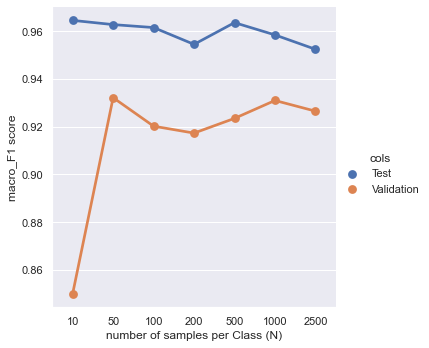

In [115]:
print(best_param)
num_labels = df_test.shape[1]

sns.set(rc={'figure.figsize':(8.0,5)})

df_test['Validation'] = best_score

final_pref = df_test[['F1_score','Validation']]
final_pref = final_pref.rename(columns={'F1_score' : 'Test'})

print(final_pref)


final_pref['N'] = final_pref.index
# print(final_pref)

final_melt = final_pref.melt('N', var_name='cols', value_name='value')
print(final_melt)

# ax = sns.lineplot(data=final_melt, x = 'N', y='value', hue = 'cols' , marker = "o", dashes = True)
ax = sns.catplot(data=final_melt, x = 'N', y='value', hue = 'cols' , kind = 'point', orient = 'v', dashes = False)
ax.set(xlabel = "number of samples per Class (N)", ylabel = "macro_F1 score")
# ax.set_ylim(0.65, 1.05)
# ax.invert_yaxis()
# plt.legend(title = 'L2 strength')
# plt.legend(title = 'L2_ratio (elasticnet)')

plt.show()

[0.01, 0.06309573444801933, 0.3981071705534973, 2.5118864315095797, 15.848931924611142, 100.0]
Train mean:  [0.73121365 0.81424382 0.82426511 0.80090512 0.8160177  0.8180665
 0.8602283 ]
Train std:  [0.06585487 0.02368474 0.01789522 0.02472976 0.00542759 0.01300859
 0.00461078]
Train mean:  [0.74981263 0.8267629  0.83609707 0.83862642 0.87475625 0.90852952
 0.9439141 ]
Train std:  [0.05244116 0.02346843 0.01692838 0.01617215 0.00768645 0.00567136
 0.00495816]
Train mean:  [0.7755217  0.86491944 0.91058634 0.9346768  0.94659827 0.95967359
 0.98495753]
Train std:  [0.04522089 0.01881958 0.01335936 0.00533882 0.00496502 0.00606685
 0.00444447]
Train mean:  [0.8422672  0.94534844 0.95180112 0.96947094 0.98850823 0.99300479
 0.9964839 ]
Train std:  [0.02640305 0.00415975 0.0050829  0.00620733 0.00318219 0.00159146
 0.00110312]
Train mean:  [0.92907523 0.98081316 0.98999857 0.99479205 0.9973333  0.99812529
 0.99891667]
Train std:  [0.01562475 0.00515584 0.00306297 0.00147397 0.00065618 0.000

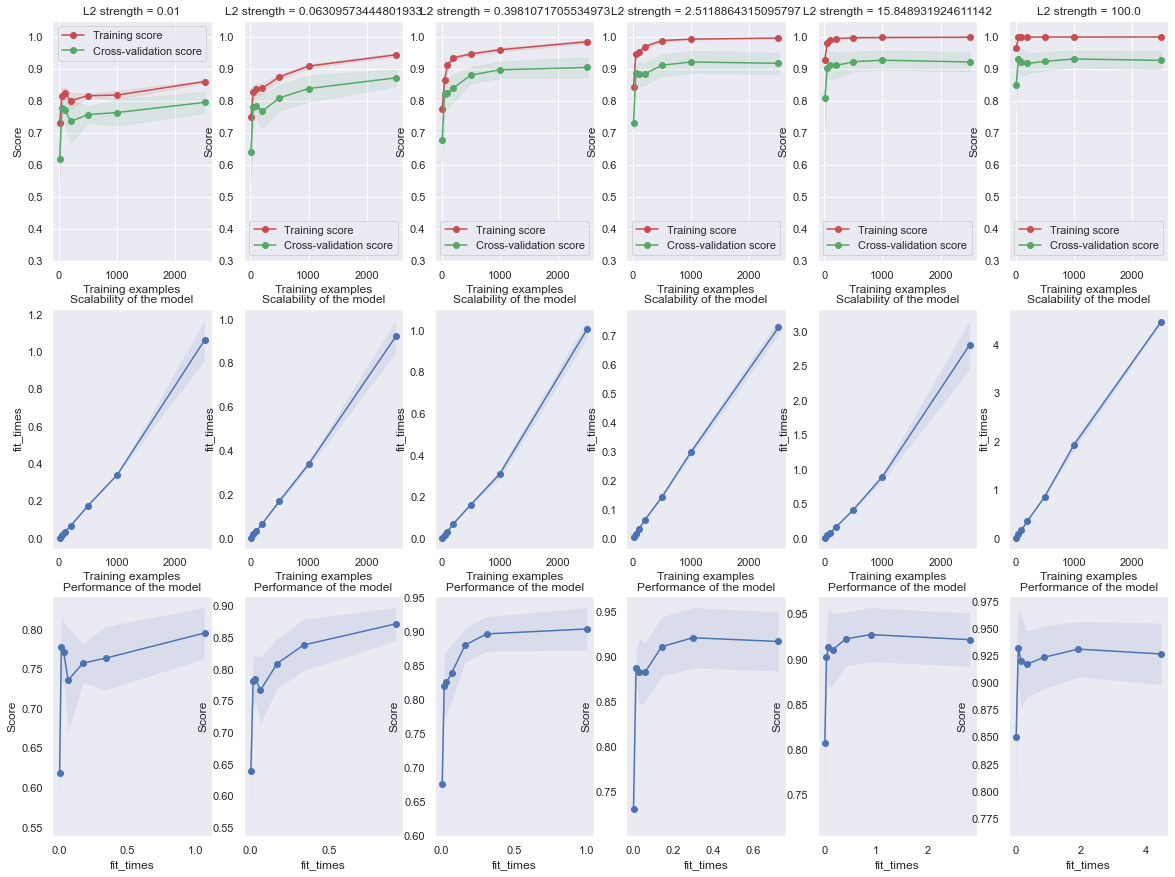

In [117]:
def plot_learning_curve(l1, axes, train_mean, train_std, validation_mean, validation_std, time_mean, time_std):
    if axes is None:
        fig, axes = plt.subplots(1, 3)
#     axes[0].set_title('L1_ratio = {}'.format(l1))
    axes[0].set_title('L2 strength = {}'.format(l1))

#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes = [10,50,100,200,500,1000,2500]
#     train_sizes = [10,50,100]  
    
    axes[0].grid()
    
    print('Train mean: ', train_mean)
    print('Train std: ',train_std)
    
      # Plot learning curve
    axes[0].grid()
    axes[0].set_ylim(0.3, 1.05)
    axes[0].fill_between(
        train_sizes,
        train_mean - train_std,
        train_mean + train_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        validation_mean - validation_std,
        validation_mean + validation_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, validation_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")


    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, time_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        time_mean - time_std,
        time_mean + time_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = time_mean.argsort()
    fit_time_sorted = time_mean[fit_time_argsort]
    test_scores_mean_sorted = validation_mean[fit_time_argsort]
    test_scores_std_sorted = validation_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# hyper = 'l1_ratio'
hyper = 'C'

space['l1_ratio'] = list(np.linspace(0, 1, 51))
space['C'] = list(np.logspace(-2, 2, 51))
# print(space[hyper])
l1_ratios = space[hyper][::10]
print(l1_ratios)

fig, axes = plt.subplots(3, len(l1_ratios), figsize=(20, 15))
for i in range(len(l1_ratios)):
    l1 = l1_ratios[i]
    plot_learning_curve(l1, axes[:,i], df_train_mean[l1].to_numpy(), df_train_std[l1].to_numpy(), df_validation_mean[l1].to_numpy(), df_validation_std[l1].to_numpy(), df_time_mean[l1].to_numpy(), df_time_std[l1].to_numpy() )








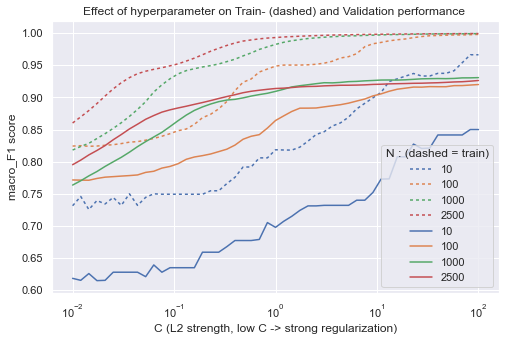

In [118]:


# print(best_param)
idx_list = [10, 100,1000, 2500]
# idx_list = [10, 50, 100, 500,1000, 2500]

plt_train_mean = df_train_mean.loc[idx_list]
plt_validation_mean = df_validation_mean.loc[idx_list]
# num_labels = df_train_mean.shape[0]
num_labels = len(idx_list)

dash = [(2,2)]*num_labels

sns.set(rc={'figure.figsize':(8.0,5)})
colors = sns.color_palette(n_colors = num_labels)
# print(df_train_mean)

ax = sns.lineplot(data=plt_train_mean.T, dashes =dash, palette = colors)
ax = sns.lineplot(data=plt_validation_mean.T, dashes = False, palette = colors )
ax.set_title("Effect of hyperparameter on Train- (dashed) and Validation performance ")

# hyper = 'l1_ratio'
hyper = 'C'
if hyper == 'C':
    ax.set(xlabel = "C (L2 strength, low C -> strong regularization)", ylabel = "macro_F1 score")
    ax.set(xscale='log')

elif hyper =='l1_ratio':
    ax.set(xlabel = "L1_ratio (elasticnet)", ylabel = "macro_F1 score")

plt.legend(title = 'N : (dashed = train)')
plt.show()

N =  100


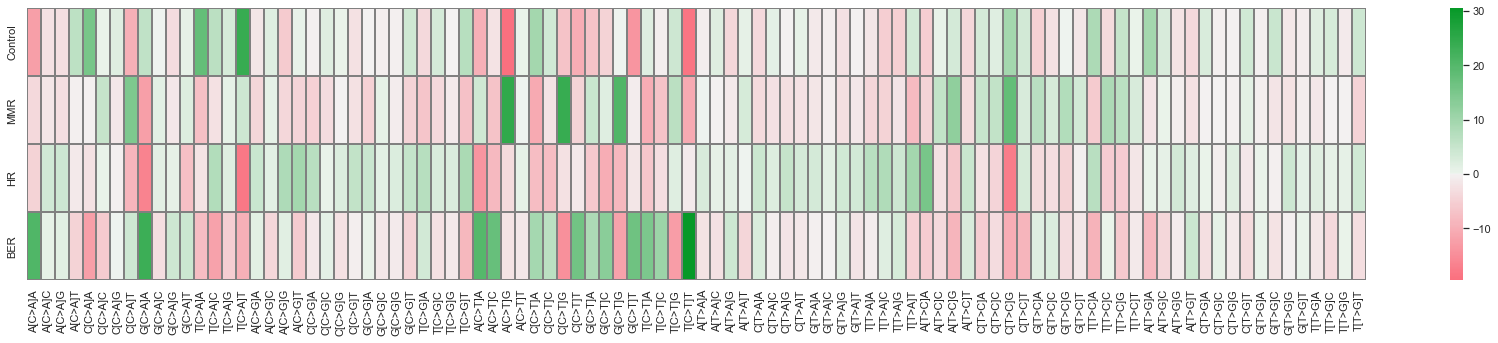

N =  1000


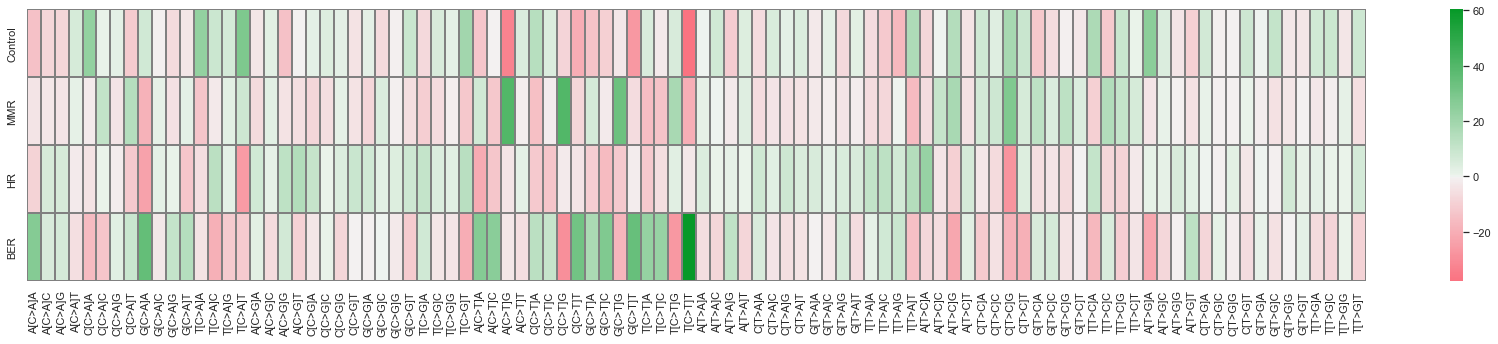

In [92]:
def print_bar_coef(coef):
    classes = ['Control', 'MMR', 'HR', 'BER']
    features = SBS_feat()

    # print('weights = ', coef[4][0])
    weights_df = pd.DataFrame(data = coef, index = classes, columns = features)
    feat_new = SBS_feat_ordered()

    # weights_df
    weights_df = weights_df.reindex(columns = feat_new)
#     weights_df

    sns.set(rc={'figure.figsize':(30.0,5)})


    rdgn = sns.diverging_palette(h_neg=10, h_pos=130, s=99, l=55, sep=1, as_cmap=True)
    ax = sns.barplot(weights_df, cmap = rdgn, center=0.00, annot=False, cbar=True, linewidths = 0.2, linecolor = 'grey')
    plt.show()
    

# print('N = ', N[0])
# print_coef(coef_score[0])
# print('N = ', N[1])
# print_coef(coef_score[1])   
print('N = ', N[2])
print_coef(coef_score[2])
# print('N = ', N[3])
# print_coef(coef_score[3])
# print('N = ', N[4])
# print_coef(coef_score[4])
print('N = ', N[5])
print_coef(coef_score[5])
# print('N = ', N[6])
# print_coef(coef_score[6])

N =  10


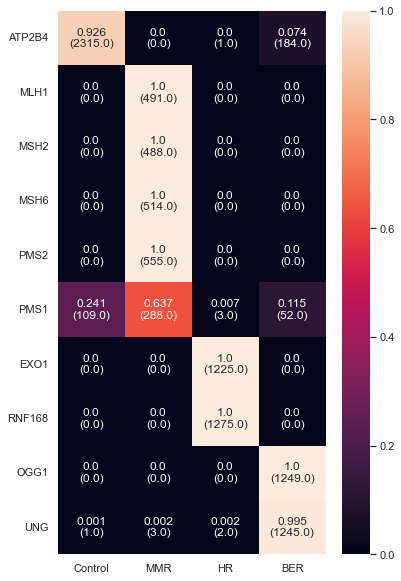

N =  100


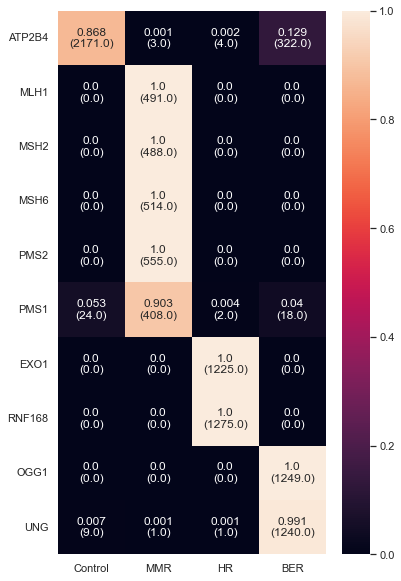

N =  1000


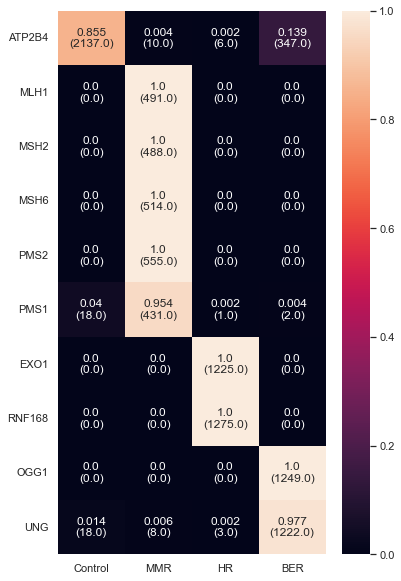

In [122]:
def print_conf(confusion):
    sum_of_rows = confusion.sum(axis=1)
    normalized_confusion = confusion / sum_of_rows[:, np.newaxis]
    normalized_confusion = np.around(normalized_confusion, decimals=3)
        
    labels = [f"{v1}\n({v2})" for v1, v2 in
          zip(normalized_confusion.flatten(), confusion.flatten() )]
    labels = np.asarray(labels).reshape(4,4)
    plt.figure(figsize = (6,4))
    df_conf = pd.DataFrame(normalized_confusion, index = ['Control', 'MMR', 'HR', 'BER'], columns = ['Control', 'MMR', 'HR', 'BER'])
    sns.heatmap(df_conf, annot=labels, fmt='', annot_kws={"size": 13})
    plt.yticks(rotation=0) 
    plt.show()

def print_conf_gene(confusion):   
    sum_of_rows = confusion.sum(axis=1)
    normalized_confusion = confusion / sum_of_rows[:, np.newaxis]
    normalized_confusion = np.around(normalized_confusion, decimals=3)
    confusion = np.around(confusion, decimals=0)

    labels = [f"{v1}\n({v2})" for v1, v2 in
          zip(normalized_confusion.flatten(), confusion.flatten() )]
    labels = np.asarray(labels).reshape(10,4)
    plt.figure(figsize = (6,10))
    df_conf = pd.DataFrame(normalized_confusion, index = ['ATP2B4', 'MLH1', 'MSH2', 'MSH6', 'PMS2', 'PMS1', 'EXO1', 'RNF168', 'OGG1', 'UNG'], columns = ['Control', 'MMR', 'HR', 'BER'])
    sns.heatmap(df_conf, annot=labels, fmt='', annot_kws={"size": 12})
    plt.yticks(rotation=0) 
    plt.show()
 

'''
Confusion Matrix per Gene_KO
''' 
# Control
c0 = ['ATP2B4']
# MMR
c1 = ['MLH1', 'MSH2', 'MSH6', 'PMS2', 'PMS1']
# HR
c2 = ['EXO1', 'RNF168']
# BER
c3 = ['OGG1', 'UNG']
classes = ['Control', 'MMR', 'HR', 'BER']
genes = c0 + c1 + c2 + c3

N = [10, 50, 100, 200, 500,1000,2500]
n_class = 4
n_genes = 10
conf_gene = [None]*len(N)

for i in range(len(N)):
#     new_dir = "C:/Users/sande/PycharmProjects/MEP_data/models/MLR/bootstrapped_sameSplit/N_{}".format(N[i])
    new_dir = "C:/Users/sande/PycharmProjects/MEP_data/models/MLR/bootstrapped_sameSplit/N_2500"

    test = pd.read_pickle(new_dir + "/test.pkl")
    test = test.reset_index()
    
    conf_gene[i] = np.zeros((n_genes,n_class))
    
    for index, row in test.iterrows():
        g = row['Gene_KO']
        idx = genes.index(g)
        col = y_pred[i][index]
        conf_gene[i][idx,col] += 1
        

print('N = ', N[0])
# print_conf(confusion[0])
print_conf_gene(conf_gene[0])

# print('N = ', N[1])
# print_conf(confusion[1])
# print_conf_gene(conf_gene[1])

print('N = ', N[2])
# print_conf(confusion[2])
print_conf_gene(conf_gene[2])

# print('N = ', N[3])
# print_conf(confusion[3])
# print_conf_gene(conf_gene[3])

# print('N = ', N[4])
# print_conf(confusion[4])
# print_conf_gene(conf_gene[4])

print('N = ', N[5])
# print_conf(confusion[5])
print_conf_gene(conf_gene[5])

# print('N = ', N[6])
# print_conf(confusion[6])
# print_conf_gene(conf_gene[6])
